In [1]:
# can be removed if LinOT package is installed via pip
import sys
sys.path.append("../../lib")

import os
import numpy as np

import LinOT
import LinOT.Visualization as Vis
import LinOT.auxiliary as aux

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('image', interpolation='nearest')
matplotlib.rc('figure',facecolor='white')
matplotlib.rc('image',cmap='viridis')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
# specify filenames for samples and tangent data
tag="ex1_single-ellipses"
subtag=""
filenameCenter="data/"+tag+"/center_data"+subtag+".npz"
filenameTan="data/"+tag+"/tan_data"+subtag+"_HK_kappa32.npz"

dat=np.load(filenameTan)
tanDataV=dat["tanListV"]
tanDataAlpha=dat["tanListAlpha"]
valueList=dat["valueList"]
imgCenter=np.load(filenameCenter)["img"]

muRef,posRef=aux.processDensity_Grid(imgCenter,\
        totalMass=1.,keepZero=False)

kappa=32.

In [3]:
# create embedding object, add samples, center samples, perform pca
Embedding=LinOT.LinHKEmbedding(muRef,posRef,kappa=kappa)
Embedding.addSamples((tanDataV,tanDataAlpha))

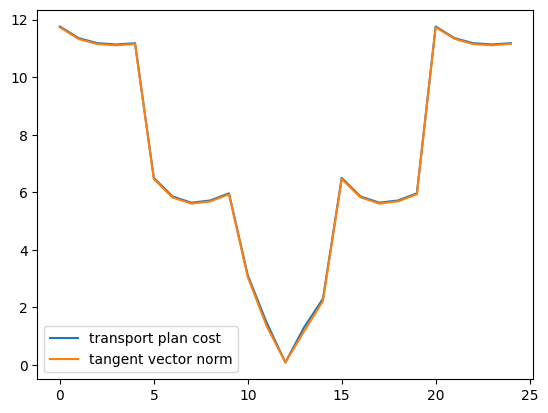

In [4]:
# compare tangent vector length vs original plan cost
plt.plot(np.sqrt(valueList),label="transport plan cost")
plt.plot(np.linalg.norm(Embedding.samples,axis=1),label="tangent vector norm")
plt.legend()
plt.show()

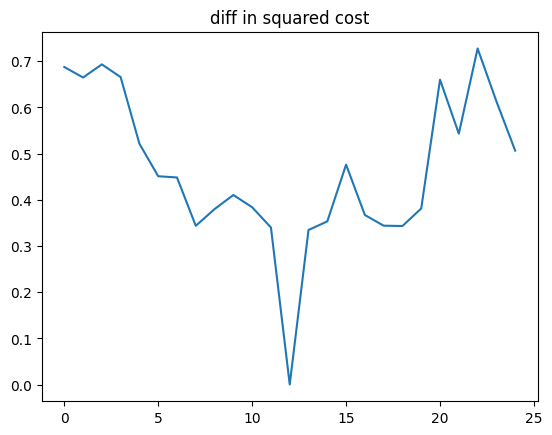

In [5]:
# difference of squared costs is on the order of 1, corresponding to pixel scale
plt.plot(valueList-np.linalg.norm(Embedding.samples,axis=1)**2)
plt.title("diff in squared cost")
plt.show()

In [6]:
Embedding.centerSamples()
Embedding.performPCA()

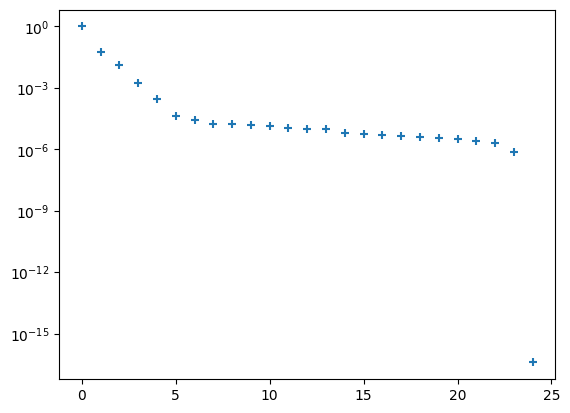

In [7]:
Vis.PCASpectrum(Embedding,normalize=True)

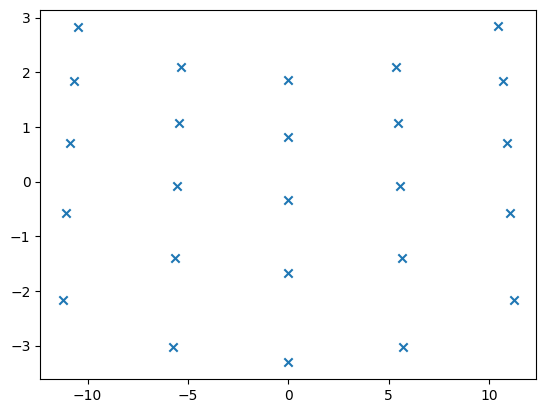

In [8]:
Vis.PCAPlot(Embedding)

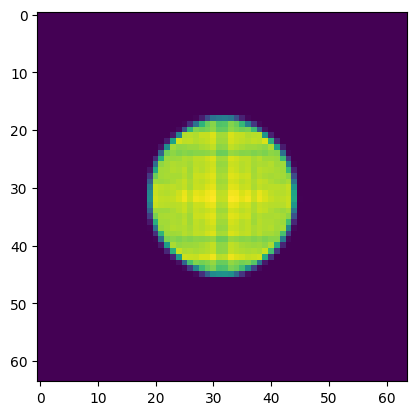

In [9]:
res=Embedding.getMeanExp()
img=aux.rasterizePointCloud2d(*res,(64,64,))
plt.imshow(img)
plt.show()

0


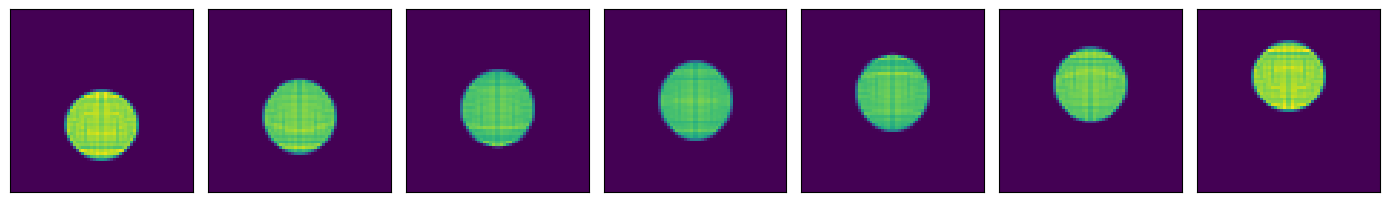

1


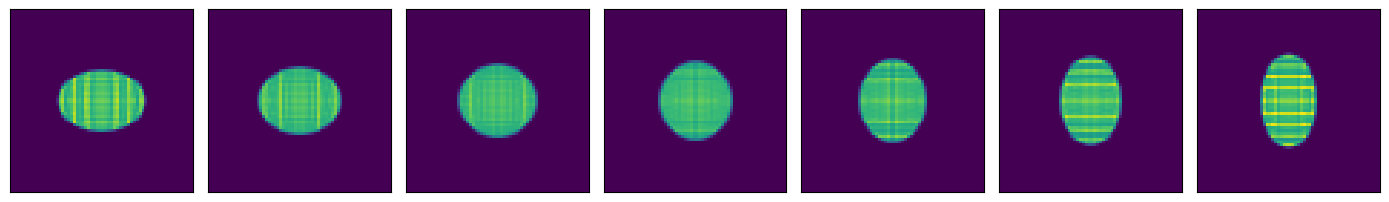

2


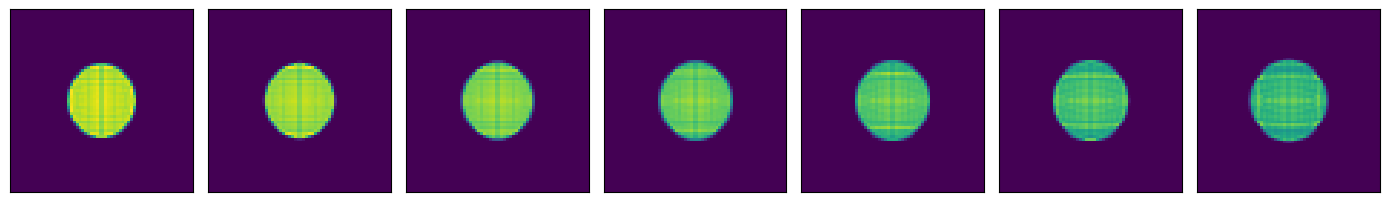

In [10]:
for i in [0,1,2]:
    print(i)
    vec=np.zeros(i+1)
    vec[i]=1.
    res=Embedding.expPCA(vec,tSeq=Embedding.pca_std[i]*np.linspace(-1,1,num=7))

    imgList=[aux.rasterizePointCloud2d(mu,pos,(64,64,)) for mu,pos in res]
    Vis.ShowImageArray(imgList,7,2,2,scaleMode="common")